# Compare Means

#### A/B Test Example 

Considering WeChat wants to use algorithms to rank the feeds on WeChat Moments instead of showing the organic feeds chronologically.

**We are testing the two approaches to rank the feeds:** 

Control Group: show feeds chronologically

Treatment Group: Rank feeds with algorithms

Metric (#days): the number of days that a user clicks any feeds on WeChat Moments during the recent 30 days. 

**Objective**: Find whether $\mu_1$ is signfiicantly different from $\mu_0$, 

Ho: $\delta$ = $\mu_1$ - $\mu_0$ = 0 

In [2]:
import numpy as np, statsmodels.stats.api as sms
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
import scipy.stats as st
import random
import pandas as pd

## t tests

In [3]:
test0_s = [1,2,1,2,1,4,3,2,4,3,2,3]
ctrl0_s = [2,3,2,4,3,5,4,3,5,5,4,3]

In [4]:
mean_d=np.mean(test0_s) - np.mean(ctrl0_s)
print(mean_d)

-1.25


In [5]:
#//usevar='unequal' or 'pooled'

cm0 = sms.CompareMeans(sms.DescrStatsW(test0_s), sms.DescrStatsW(ctrl0_s))
print(cm0.ttest_ind(alternative='two-sided', usevar='unequal'))

(-2.8393466239285283, 0.009542324891921597, 21.997899382545775)


**The WeChat Experiment Example**

In [3]:
#Population Characeristics
lift = 1.001
ctr0=0.5
ctr1=ctr0*lift
m0=30*ctr0
m1=30*ctr1
delta_p = m1-m0
se_p_0 = np.sqrt(30*ctr0*(1-ctr0))
se_p_1 = np.sqrt(30*ctr0*lift*(1-ctr0*lift))

In [59]:
print(delta_p,se_p_0,se_p_1)

0.014999999999998792 2.7386127875258306 2.7386114182190946


In [9]:
#DRAW SAMPLES from Treatment and Control Populations, k=1000
ctrl = np.random.binomial(30, p=ctr0, size=50) * 1.0
test = np.random.binomial(30, p=ctr1, size=50) * 1.0

In [10]:
#Sample characteristics
delta_s = np.mean(test)-np.mean(ctrl)
se0 = np.std(ctrl)
se1 = np.std(test)
print(delta_s)

-0.620000000000001


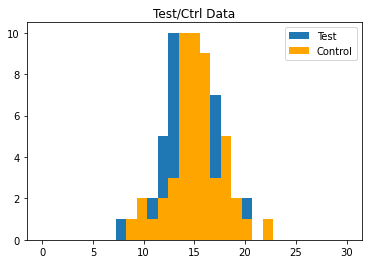

In [11]:
bins = np.linspace(0, 30, 30)
plt.hist(test, bins=bins, label='Test')
plt.hist(ctrl, bins=bins, label='Control', color='orange')
plt.title('Test/Ctrl Data')
plt.legend()

In [12]:
cm = sms.CompareMeans(sms.DescrStatsW(test), sms.DescrStatsW(ctrl))
se_s = cm.std_meandiff_separatevar

In [13]:
print(cm.ttest_ind(alternative='two-sided', usevar='unequal'))

(-1.2026452604350089, 0.23201576184314465, 97.84757101932192)


# z tests

In [15]:
print(cm.ztest_ind(alternative='two-sided', usevar='unequal'))

(-1.2026452604350089, 0.22911362509585143)
